<a href="https://colab.research.google.com/github/Shruti-425/AIML/blob/main/experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded =files.upload()

Saving student-dataset.csv to student-dataset.csv


In [3]:
from google.colab import drive
file_path = '/content/drive/My Drive/student-dataset.csv'

In [4]:
file_path = 'student-dataset.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

First 5 rows of the dataset:
   id             name               nationality                 city  \
0   0        Kiana Lor                     China               Suzhou   
1   1   Joshua Lonaker  United States of America        Santa Clarita   
2   2    Dakota Blanco  United States of America              Oakland   
3   3  Natasha Yarusso  United States of America        Castro Valley   
4   4   Brooke Cazares                    Brazil  São José dos Campos   

   latitude  longitude gender  ethnic.group  age  english.grade  math.grade  \
0     31.31     120.62      F           NaN   22            3.5         3.7   
1     34.39    -118.54      M           NaN   22            2.9         3.2   
2     37.80    -122.27      F           NaN   22            3.9         3.8   
3     37.69    -122.09      F           NaN   20            3.3         2.8   
4    -23.18     -45.88      F           NaN   21            3.7         2.6   

   sciences.grade  language.grade  portfolio.rating  cove

In [7]:
numeric_df = df.select_dtypes(include=['number'])
# Impute missing values in numeric columns with their median
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median())

In [13]:
X = df[['math.grade', 'english.grade']]
y = df['gender']

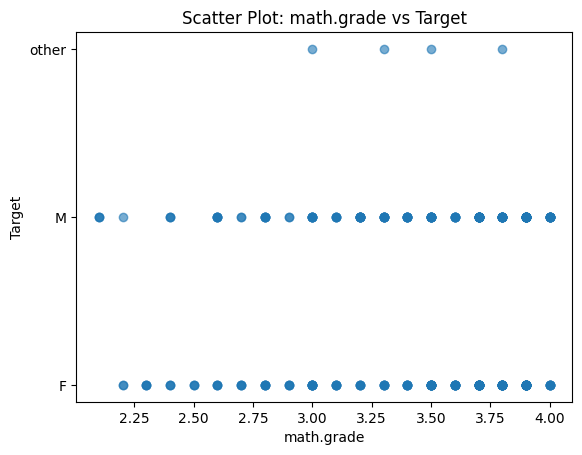

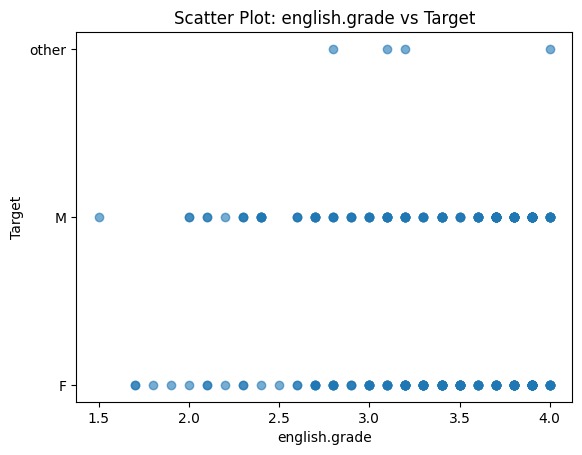

In [15]:
for feature in X.columns:
    plt.scatter(df[feature], y, alpha=0.6) # Changed dataset to df
    plt.title(f"Scatter Plot: {feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.show()

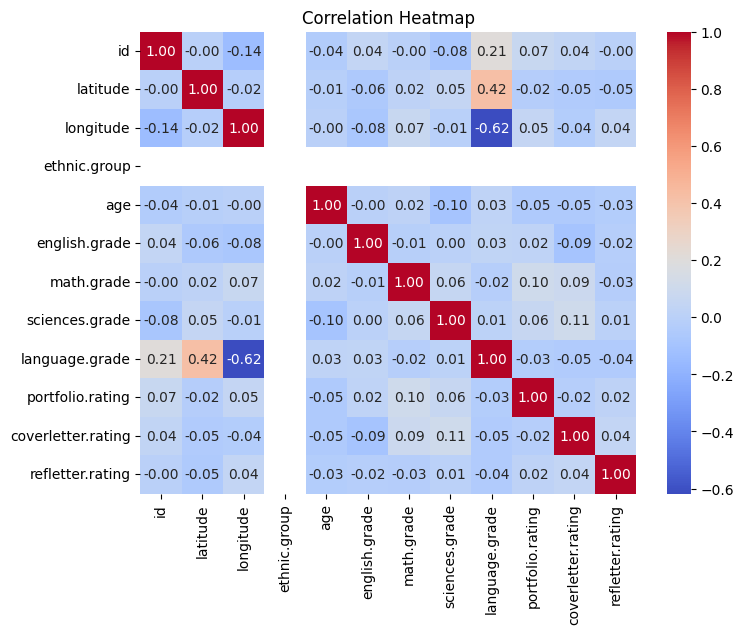

In [18]:
# Select only numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Now use the encoded target variable for training
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.5611143925135117
Mean Squared Error (MSE): 0.3630773956134714
R-squared (R²): -0.04701388502489423


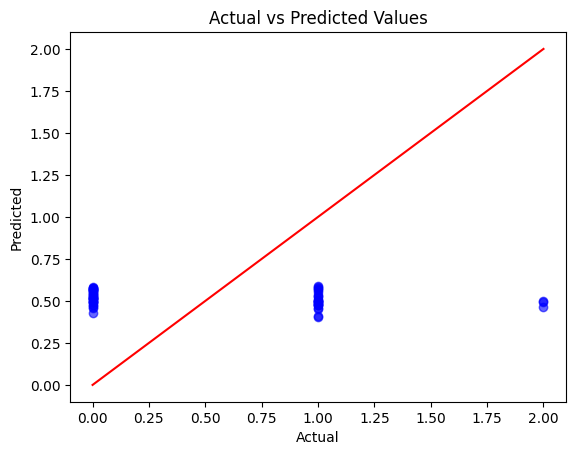

In [25]:
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

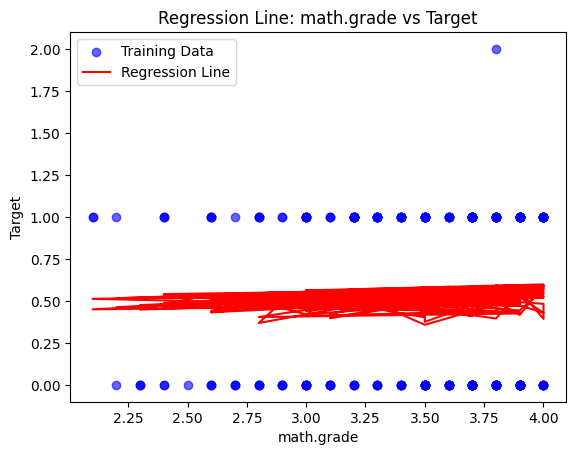

In [27]:
feature = 'math.grade'  # Or 'english.grade', depending on the desired feature
plt.scatter(X_train[feature], y_train, alpha=0.6, color='blue', label='Training Data')
plt.plot(X_train[feature], model.predict(X_train), color='red', label='Regression Line')
plt.title(f"Regression Line: {feature} vs Target")
plt.xlabel(feature)
plt.ylabel("Target")
plt.legend()
plt.show()